# Exploración de un conjunto de datos con Python y Pandas
## Configuración del ambiente
### Prerequisitos
### Instalación de Pandas  (si no lo han hecho aún) 

### Para instalarlo en Thonny hágalo desde la herramienta de gestión de paquetes:  
#### Tools --> Manage Packages

### Si está trabajando directamente con Python u otro ambiente, desde el Shell

#### python -m pip install pandas

### Si está trabajando con Anaconda o Conda utilice esta instrucción desde el Shell

##### conda install pandas

###  Hola Pandas
#### Lo primero es Importar los módulos a usar

In [1]:
import numpy as np    # Pandas está basado en NumPy (Numerical Python) por lo que hay que importarlo también
import pandas as pd
import requests       #  Módulo con funciones para obtener archivos desde la Internet

# Pandas tiene su módulo para hacer gráficas basado en otro módulo
#    llamado MatPlotLib, se usa esta instrucción para que las gráficas salgan en Notebook
%matplotlib inline    

#### En la siguiente sección se obtiene una base de datos de la NBA desde la Internet y la guardan en su computador. 
#### Primero, le damos la dirección de los datos en Internet, y la dirección en nuestro computador donde queremos guardar los datos

In [2]:
url_datos_fuente = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
path_en_mi_compu = "nba_all_elo.csv"

#### Se procede a descargar y guardar en nuestro computador

In [3]:
respuesta = requests.get(url_datos_fuente)
respuesta.raise_for_status()
with open(path_en_mi_compu, "wb") as f:
    f.write(respuesta.content)
print("Descarga, lista!")

Descarga, lista!


####  Una vez en nuestro computador, leemos el archivo desde allí

In [4]:
nba = pd.read_csv("nba_all_elo.csv")

type(nba)

pandas.core.frame.DataFrame

###  Veamos el formato general de los datos

#### Obtener la longitud de la base de datos (número de registros o entradas)

In [5]:
len(nba)

126314

#### Obtener el formato de la base de datos (longitud y número de columnas)

In [ ]:
nba.shape

#### Desplegar los primeros registros (default = 5 registros)

In [ ]:
nba.head()

#### Si el número de columnas excede el especificado, se trunca al número dado.  None = no truncar

In [ ]:
pd.set_option("display.max.columns", None)

#### Especificar el número de cifras decimales dado, si el número es float (default = 6)

In [ ]:
pd.set_option("display.precision", 2)

#### Desplegar los últimos registros (default = 5)

In [ ]:
nba.tail()

## Ejercicio

### Puede mostrar las últimas 3 líneas del `DataFrame`?

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [157]:
nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


## Explorar un poco los datos

### Desplegar los tipos de datos con `.info()`

In [ ]:
nba.info()

### Mostrar estadísticas básicas con `.describe()`
#### Desplegar información sobre columnas con valores numéricos

In [ ]:
nba.describe()   

#### Desplegar información sobre columnas con valores no numéricos

In [ ]:
nba.describe(include=np.object)   

### Una pequeña exploración de datos con Pandas
#####  Ver cuántos registros hay de cada equipo.  Pandas permite usar el nombre de las columnas como índice

In [ ]:
nba["team_id"].value_counts()

####  Ver cuántos registros hay de cada franquicia.

In [ ]:
nba["fran_id"].value_counts()

#### Hay algo raro acá.  Los datos de la franquicia Lakers no coinciden con los del equipo LAL.  Busquemos la Id de los equipos para la franquicia Lakers.  (Más abajo hablaremos sobre el .loc)

In [ ]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

####  Ajá!!!   Apareció otro equipo bajo la franquicia Lakers:   MNL (Minnesota Lakers)
####  Veamos cuál es la primera fecha en que jugó este equipo

In [ ]:
nba.loc[nba["team_id"] == "MNL", "date_game"].min()

####  Ahora veamos cuál es la última fecha en que jugó este equipo

In [ ]:
nba.loc[nba["team_id"] == "MNL", "date_game"].max()

#### Otra forma de encontrar estas fechas, con una sola instrucción

In [ ]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max"))

## Ejercicio

### Encontrar cuantos puntos han anotado los Boston Celtics a lo largo de todos los partidos que están en este conjunto de datos.

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [167]:
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

## Conociendo las estructuras de datos de Pandas
#### Para los siguientes ejercicios construiremos unos datos ficticios
### `Series`:    El elemento básico de construcción en Pandas
####  Creamos una serie con los siguientes datos

In [ ]:
ingresos = pd.Series([5555, 7000, 1980])

ingresos

#### Nótese que aparecen dos columnas.  La primera columna es el índice implícito de cada valor, va de 0 a n-1

In [ ]:
ingresos.values

In [ ]:
ingresos.index

In [ ]:
type(ingresos.values)

#### Nótese que el tipo de dato aparece como un arreglo de NumPy.  Los arreglos o matrices son el plato fuerte de NumPy
##### Ahora creamos otra serie pero esta vez el índice se lo damos nosotros

In [ ]:
ingresos_ciudades = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)

ingresos_ciudades


### `Series de Pandas` vs estructuras que vienen incluídas en Python
#### También podemos crear una serie usando Diccionarios

In [ ]:
conteo_empleados_ciudades = pd.Series({"Amsterdam": 5, "Tokyo": 8})

conteo_empleados_ciudades

#### Podemos usar el método keys() con la serie

In [ ]:
conteo_empleados_ciudades.keys()

#### Hasta podemos usar operadores que hemos visto con Listas, Diccionarios, etc.

In [ ]:
"Tokyo" in conteo_empleados_ciudades

In [ ]:
"Nueva York" in conteo_empleados_ciudades

### `DataFrame`:  La estructura de datos más popular de Pandas
####  Podemos crear un Dataframe a partir de dos o más series

In [ ]:
datos_ciudades = pd.DataFrame({
    "ingresos": ingresos_ciudades,
    "conteo_empleados": conteo_empleados_ciudades
})

datos_ciudades

In [ ]:
datos_ciudades.index

In [ ]:
datos_ciudades.values

####  Se usa el método axes (ejes) para referirse a ambos filas y columnas

In [ ]:
datos_ciudades.axes

####  axes[0] se refiere a las filas

In [ ]:
datos_ciudades.axes[0]

####  axes[1] se refiere a las colummnas

In [ ]:
datos_ciudades.axes[1]

In [ ]:
datos_ciudades.keys()

In [ ]:
"Amsterdam" in datos_ciudades

In [ ]:
"ingresos" in datos_ciudades

## Ejercicio

### Apliquemos lo último que hemos aprendido, a nuestros datos de la NBA
### Despliegue el índice y los ejes del conjunto de datos `nba`.  
### Revise si tiene una columna "points". O... se llamará "pts"?

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [186]:
nba.index

RangeIndex(start=0, stop=126314, step=1)

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [187]:
nba.axes[0]

RangeIndex(start=0, stop=126314, step=1)

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [188]:
nba.axes[1]

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

## El acceso a los elementos en `listas` de Python y en `Series` de Pandas: Simillitudes y Diferencias
### Los beneficios y limitaciones del operador de indización de Python `[]`

In [ ]:
ingresos_ciudades

#### Pandas permite el uso de los nombres de las columnas como índices

In [ ]:
ingresos_ciudades["Toronto"]

####  También acepta que se utilicen los indices númericos como se hace con listas

In [ ]:
ingresos_ciudades[1]

In [ ]:
ingresos_ciudades[-1]

In [ ]:
ingresos_ciudades[1:]

####  Y todas las reglas que vimos para rodajas "slices" de listas son válidas con los nombres de las columnas

In [ ]:
ingresos_ciudades["Toronto":]

### Acceso a elementos de `Series` via `.loc` e `.iloc`

#### Para los siguientes ejercicios, construimos un nuevo conjunto de datos

In [ ]:
colores = pd.Series(
    ["rojo", "morado", "azul", "verde", "amarillo"],
    index=[1, 2, 3, 5, 8]
)

colores

####  .loc se refiere a que se van a utilizar índices explicitos (dados por nosotros)

In [ ]:
colores.loc[1]

####  .iloc se refiere a que se van a utilizar índices implícitos (dados por Pandas).   Recordemos que Python empieza la numeración con 0.

In [ ]:
colores.iloc[1]

#### La siguiente imagen muestra el uso de estos indices
<img src="iloc_vs_loc.png">

#### Desplegar los elementos con los índice implícitos 1 y 2

In [ ]:
colores.iloc[1:3]

#### Desplegar los elementos con los índices explícitos entre 3 y 8

In [ ]:
colores.loc[3:8]

In [ ]:
colores.iloc[-2]

## Accesando los elementos de un `DataFrame`
### Accesando las columnas de un `DataFrame`
#### Regresemos a nuestros datos sobre ciudades

In [ ]:
datos_ciudades["ingresos"]

In [ ]:
type(datos_ciudades["ingresos"])

In [ ]:
datos_ciudades.ingresos

#### Se puede ver que ambos datos_ciudades["ingresos"] y datos_ciudades.ingresos dan el mismo resultado

#### Hay una instancia donde lo anterior no se cumple.  Cuando el nombre de una columna coincide con un atributo o método de los DataFrames, pueden ocurrir cosas inesperadas.  Para ilustrar esto, crearemos un DataFrame nuevo, esta vez con nombres de columnas en inglés:

In [ ]:
juguetes = pd.DataFrame([
    {"name": "pelota", "shape": "esfera"},
    {"name": "Cubo de Rubik", "shape": "cubo"}
])

juguetes["shape"]

In [ ]:
juguetes.shape

### Accesando a las filas de un `DataFrame` con `.loc` e `.iloc`

#### Volvemos con nuestros datos de ciudades

In [ ]:
datos_ciudades.loc["Amsterdam"]

In [ ]:
datos_ciudades.loc["Tokyo": "Toronto"]

In [ ]:
datos_ciudades.iloc[1]

## Ejercicio

### De nuevo, practiquemos lo aprendido, con los datos de la NBA
### Despliege la penúltima fila del conjunto de datos `nba`.

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [209]:
nba.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                 1.7e+03
elo_n                 1.7e+03
win_equiv                  59
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i             1.8e+03
opp_elo_n             1.8e+03
game_location               H
game_result                 L
forecast                 0.48
notes                     NaN
Name: 126312, dtype: object

### Acceder a un subconjunto de filas y columnas en un `DataFrame` con `.loc` e `.iloc`
#### Para un DataFrame, los métodos de acceso .loc e .iloc también acceptan un segundo parámetro. El primer parámetro selecciona filas basado en los índices, el segundo parámetro selecciona columnas. Se pueden utilizar estos parámetros juntos para seleccionar un subconjunto de filas y columnas del DataFrame:

In [ ]:
datos_ciudades.loc["Amsterdam": "Tokyo", "ingresos"]

## Ejercicio

### Probemos esto con nuestros datos de la NBA
### Déle un vistazo a los juegos con índices 5555 and 5559. Nos interesan unicamente los nombres de los equipos y los resultados.

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [211]:
nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


## Consultas (Queries) con Pandas

In [ ]:
decada_actual = nba[nba["year_id"] > 2010]

decada_actual.shape

In [ ]:
juegos_con_anotaciones = nba[nba["notes"].notnull()]
juegos_con_anotaciones.shape

In [ ]:
terminado_con_ers = nba[nba["fran_id"].str.endswith("ers")]
terminado_con_ers.shape

##  Uso del query()

#### A partir de este punto estaremos trabajando con un método muy fácil de utilizar, el __query()__

#### Para los que estén familiarizados con SQL, tiene mucho en común con la instrucción __"where"__

In [ ]:
nba.query('(_iscopy == 0) & (pts > 100) & (opp_pts > 100) & (team_id == "BLB")')

####  Sin usar el query(), la instrucción sería así:

nba[
    (nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
 ]
 #### Cuál parece más fácil?

## Ejercicio

### En la primavera de 1992, ambos equipos de Los Angeles tuvieron que jugar un juego de "casa" en una cancha ajena. Encuentre esos 2 juegos. 
#### Ayuda:
#### Ambos equipos tienen un ID que empieza con "LA".
#### Será útil utilizar la columna "_iscopy"
#### Lo más probable es que la columna "notes" no este vacía

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [216]:
nba[
    (nba["_iscopy"] == 0) &
    (nba["team_id"].str.startswith("LA")) &
    (nba["year_id"]==1992) &
    (nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


## Agregaciones (Aggregations)
### Agregaciones con `Series`

In [ ]:
ingresos_ciudades.sum()

In [ ]:
ingresos_ciudades.max()

### Agregaciones con un `DataFrame`

In [ ]:
puntos = nba["pts"]

type(puntos)

In [ ]:
puntos.sum()

### Agrupamientos (Grouping)
####  Agrupemos los datos por la franquicia y obtengamos el total de puntos de cada una

In [ ]:
nba.groupby("fran_id", sort=False)["pts"].sum()

####  A continuación, note el uso de los paréntesis extremos, esto permite considerar todo el bloque como una sola instrucción.  Si no se usan, daría un error de indentación

In [ ]:
(nba.query('(fran_id == "Spurs") & (year_id > 2010)')
    .groupby(["year_id", "game_result"])["game_id"]
    .count()
)

## Ejercicio

### Echémos un vistazo a la temporada 2014-15 (year_id: 2015) de los Golden State Warriors. Cuántos juegos ganados y perdidos tuvieron durante la temporada regular y los playoffs?

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [10]:
nba.query('(fran_id == "Warriors") & (year_id == 2015)').groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

## Manipulación de  Columnas

#### Haremos una copia de nuestros datos del NBA para asegurar que los datos originales no se pierdan

In [ ]:
df = nba.copy()

df.shape

### Agregar nuevas Columnas

In [ ]:
df["diferencia"] = df.pts - df.opp_pts

df.shape

In [ ]:
df["diferencia"].max()

### Renombrar Columnas

In [ ]:
df_renombrado = df.rename(
    columns={"game_result": "resultado", "game_location": "lugar_de_juego"}
)

df_renombrado.info()

### Eliminación de Columnas

In [ ]:
df.shape

In [ ]:
columnas_elo = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]

df.drop(columnas_elo, inplace=True, axis=1)

df.shape

### Cambiar el tipo de datos de Columnas

In [ ]:
df.info()

####  Pandas tiene un tipo de dato especial para fechas, la base de datos tiene la fecha como cadena, la cambiaremos al nuevo tipo de dato

In [ ]:
df["date_game"] = pd.to_datetime(df["date_game"])

####  Cuántos valores diferentes hay para el lugar donde se lleva a cabo el juego?

In [ ]:
df["game_location"].nunique()

####  Cuáles son los diferentes valores?

In [ ]:
df["game_location"].value_counts()

####  Estos valores son strings.  Para poder manejarlos mejor, cambiémoslos a valores categóricos (discretos)

In [ ]:
df["game_location"] = pd.Categorical(df["game_location"])

In [ ]:
df["game_location"].dtype

## Ejercicio

### Encuentre otra columna que tenga un tipo de datos genérico y cámbie el tipo a categórico

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ
#  La variable que buscamos solo puede tener dos valores, cómo podemos saber cuántos valores
#  únicos tiene esa variable?

In [236]:
#  La variable game_result solo puede tener dos valores "W" o "L""
df["game_result"].nunique()

2

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [237]:
df["game_result"].value_counts()

L    63157
W    63157
Name: game_result, dtype: int64

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ
# Cambiar el tipo genérico a uno categórico

In [239]:
df["game_result"] = pd.Categorical(df["game_result"])

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

In [241]:
df["game_result"].dtype

CategoricalDtype(categories=['L', 'W'], ordered=False)

## Limpiando los Datos
####  Quizás la tarea más difícil en el análisis de datos es la limpieza o depuración de los mismos
### Valores faltantes

In [ ]:
nba.info()

####  Eliminemos o botemos "drop" las filas que tengan datos faltantes

In [ ]:
filas_sin_datos_faltantes = nba.dropna()

filas_sin_datos_faltantes.shape

####  Note que no especificamos axes para indicar que queremos eliminar filas, esto es porque el default es axes = 0
####  Hagamos lo mismo con las columnas que tengan datos faltantes

In [ ]:
datos_sin_columnas_faltantes = nba.dropna(axis=1)

datos_sin_columnas_faltantes.shape

####  Podemos llenar, o completar, datos faltantes con algún valor deseado

In [ ]:
datos_con_anotaciones_default = nba.copy()   #  Hacemos una copia para no perder el original

datos_con_anotaciones_default["notes"].fillna(
    value="no hay anotaciones",
    inplace=True
)

datos_con_anotaciones_default["notes"].describe()

### Valores inválidos
#### Es buena práctica es revisar si hay valores que no son válidos, o no tienen sentido
####  No parecería lógico que hubiera un partido de la NBA con 0 puntos, pero chequeémos

In [ ]:
nba.query('pts == 0')

####  Wow!!!  Hay un partido donde el resultado final fue 2 a 0, debe ser un error, habrá que verificarlo!  No lo haremos pero sería interesante ver qué fue lo que pasó

### Inconsistencias entre valores de columnas diferentes
#### Otra buena practica es buscar datos que no tienen sentido entre sí
#### No esperaríamos que el equipo con más puntos en un partido no aparezca como el ganador "w"

In [ ]:
nba.query('(pts > opp_pts) & (game_result != "W")').empty

#### o al revés, que el equipo con menos puntos no fuera el perdedor "L"

In [ ]:
nba.query('(pts < opp_pts) & (game_result != "L")').empty

## Trabajando con múltiples conjuntos de datos en Pandas
### Combinar Datos basados en el índice con `concat()`
#### Para ver esto, regresamos a nuestros datos de ciudades y agreguemos unas ciudades más

In [ ]:
mas_datos_ciudades = pd.DataFrame(
    {"ingresos": [7000, 3400], "conteo_empleados":[2, 2]},
    index=["Nueva York", "Barcelona"]
)

todos_los_datos_ciudades = pd.concat([datos_ciudades, mas_datos_ciudades], sort=False)

todos_los_datos_ciudades

In [ ]:
paises_ciudades = pd.DataFrame({
    "pais": ["Holanda", "Japon", "Holanda", "Canada", "España"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

ciudades = pd.concat([todos_los_datos_ciudades, paises_ciudades], axis=1, sort=False)

ciudades

In [ ]:
pd.concat([todos_los_datos_ciudades, paises_ciudades], axis=1, join="inner")

### Combinación de datos basados en columnas arbitrarias con `merge()`

In [ ]:
paises = pd.DataFrame({
    "poblacion_millones": [17, 127, 37],
    "continente": ["Europa", "Asia", "Norte America"]
}, index= ["Holanda", "Japon", "Canada"])

pd.merge(ciudades, paises, left_on="pais", right_index=True)

In [ ]:
pd.merge(
    ciudades,
    paises,
    left_on="pais",
    right_index=True,
    how="left"
)

## Visualización de datos de un DataFrame de Pandas
#### Dicen que una imagen vale mil palabras.  Definitivamente eso es cierto.  Veremos como sacar algunas gráficas
#### El ";" al final de la instrucción no es necesario, pero bloquea un texto de ejecución que no nos es útil
#### Veamos el historial de puntos anotados por los Knicks, cada año

In [ ]:
nba.query('fran_id == "Knicks"').groupby("year_id")["pts"].sum().plot();  

#### En la instrucción anterior se puede ver una de las cosas muy poderosas de Pandas:  la capacidad de encadenar métodos, uno tras otro
#### Generémos una gráfica de barras, esta vez para ver el número de juegos que ha jugado cada franquicia en su historia (los 10 más altos) 

In [ ]:
nba["fran_id"].value_counts().head(10).plot(kind="bar");  

## Ejercicio

### En el 2013, el Miami Heat ganó el campeonato. Cree una gráfica de pastel (pie plot) que muestre el número de juegos ganados y perdidos durante esa temporada.

In [ ]:
# Utilice el espacio de arriba para generar esta solución - NO ESCRIBA ACÁ

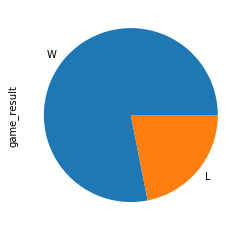

In [256]:
nba.query('(fran_id == "Heat") & (year_id == 2013)')["game_result"].value_counts().plot(kind="pie");